In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F39466%2F61155%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240825%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240825T075438Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db896b630b210f614aff6131d3442519f8205300c9e8d5377d9bb9287d154e333c5a61c6f9685fe26678624f1b6423adfdd1a3324f356d1facd3436a82aabb2b7471347e385e43921cd350f7d010a85fa417af931b48e89627903ec4801d368d7a66bcc17148000a5dcc21ef66b70eefe83c0f2adabf170d826427c266dd410feb5840ed5b94311cf94bd3624acafa1247a03438c126c0bd9245d2172beed1798205ee5a4c039e3e41aac381582838335f9b94dd7d5155a70cec5149fb5b13d1556323f601175917a43dd3cbdb393927c34461a73b8fbf92b1c951982b295a74d8c9b103ad10cdc3e590b46b6d4ceaf3e7e4a517ad1eb6731cf485402e7088c88'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2286085038 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,GlobalAveragePooling2D
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ... (rest of your imports)

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'07_ok': 0,
 '01_palm': 1,
 '05_thumb': 2,
 '10_down': 3,
 '06_index': 4,
 '02_l': 5,
 '08_palm_moved': 6,
 '04_fist_moved': 7,
 '09_c': 8,
 '03_fist': 9}

In [ ]:
x_data = []
y_data = []
IMG_SIZE = 150
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' +
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                path = '../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

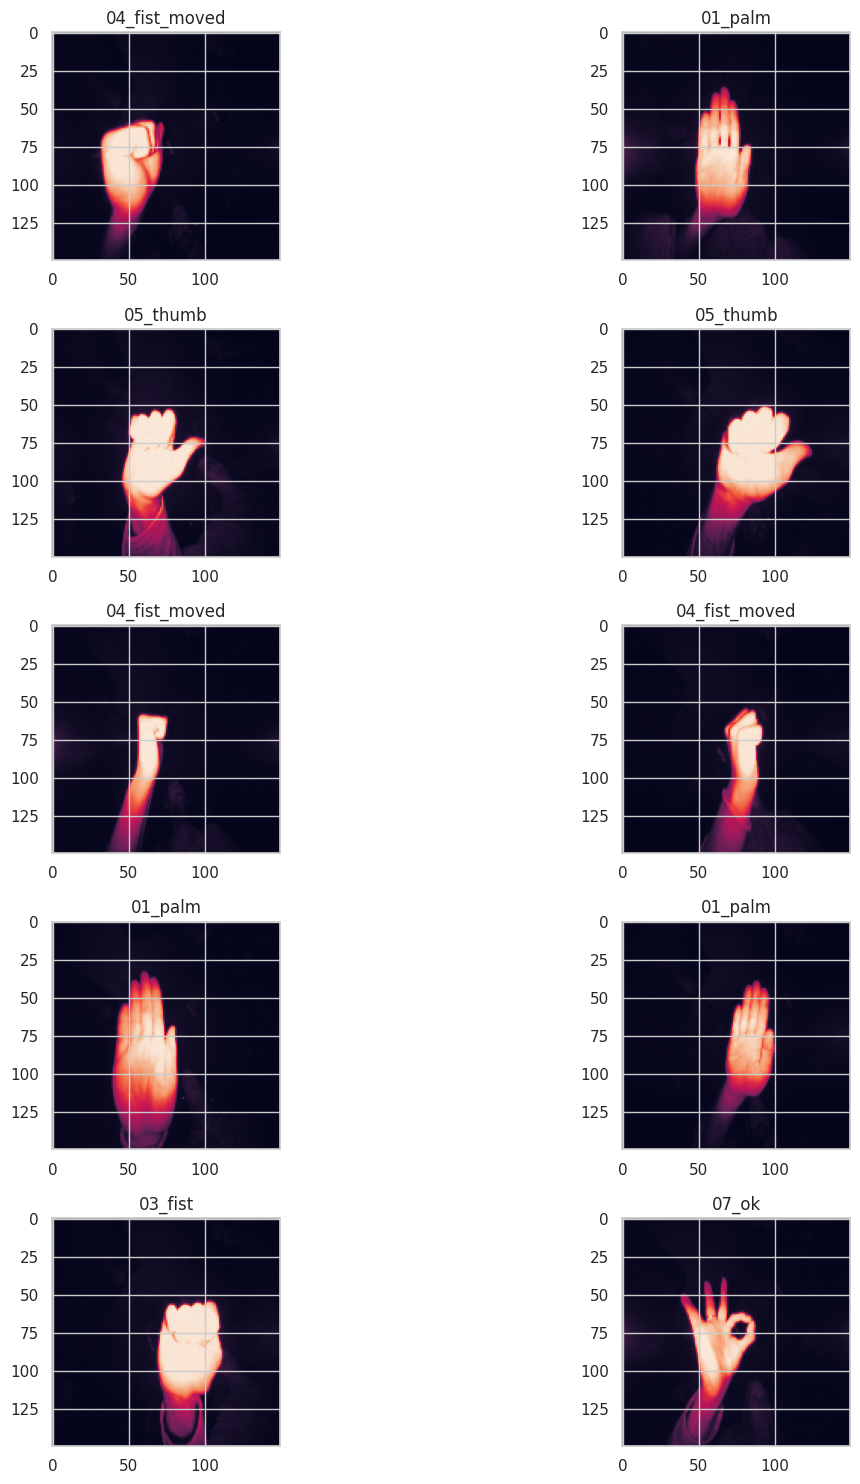

In [ ]:
# check some image
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverselookup[y_data[l,0]])

plt.tight_layout()

In [ ]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [ ]:
batch_size=128
epochs=10

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    './base.model.keras',  # Add the .keras extension
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    save_freq='epoch'
)
# ... rest of your code ...
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    # profile_batch = '500,520' # consider adding profiling
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # Use learning_rate instead of lr

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,144,714 (15.81 MB)

 Trainable params: 4,144,714 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6727 - loss: 0.9628
Epoch 1: val_loss improved from inf to 0.02030, saving model to ./base.model.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 895s 7s/step - accuracy: 0.6744 - loss: 0.9580 - val_accuracy: 0.9954 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9974 - loss: 0.0097
Epoch 2: val_loss improved from 0.02030 to 0.00572, saving model to ./base.model.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 858s 7s/step - accuracy: 0.9974 - loss: 0.0097 - val_accuracy: 0.9992 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9988 - loss: 0.0058
Epoch 3: val_loss did not improve from 0.00572
118/118 ━━━━━━━━━━━━━━━━━━━━ 848s 7s/step - accuracy: 0.9988 - loss: 0.0058 - val_accuracy: 0.9954 - val_loss: 0.0162 - learning_rate: 0.0010
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9985 - loss: 0.0065
Epoch 4: val_loss

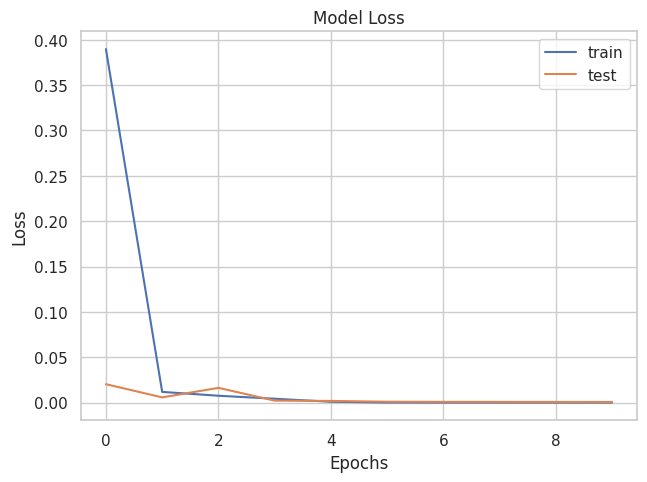

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

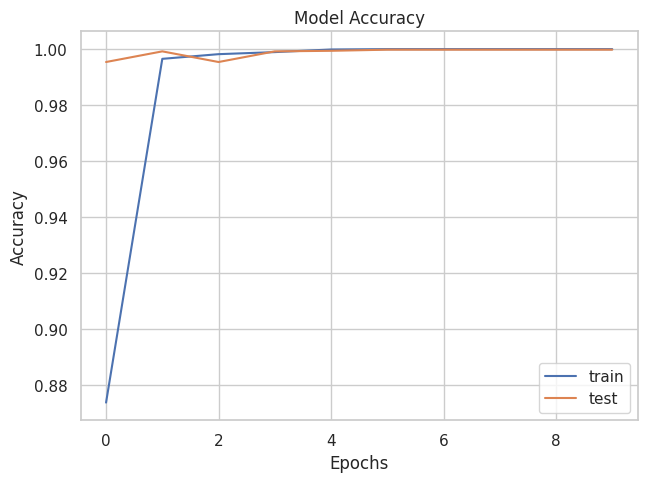

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
acc= History.history['accuracy']
val_acc= History.history['val_accuracy']
loss= History.history['loss']
val_loss= History.history['val_loss']

In [ ]:
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.8738666772842407, 0.9965333342552185, 0.998199999332428, 0.9989333152770996, 0.9998666644096375, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9954000115394592, 0.9991999864578247, 0.9954000115394592, 0.9991999864578247, 0.9994000196456909, 0.9998000264167786, 0.9998000264167786, 0.9998000264167786, 0.9998000264167786, 0.9998000264167786]
[0.38970062136650085, 0.011778492480516434, 0.00754301343113184, 0.0042406409047544, 0.0009112227708101273, 4.343531691120006e-05, 1.1237841135880444e-05, 7.88616125646513e-06, 6.0141119320178404e-06, 4.750010702991858e-06]
[0.02029559761285782, 0.005716244224458933, 0.016244374215602875, 0.002160770120099187, 0.0018106935312971473, 0.0009402344585396349, 0.0008025697898119688, 0.0007583921542391181, 0.0007179127424024045, 0.0006824470474384725]


In [ ]:
ac=np.array(acc)
val_ac=np.array(val_acc)
lo=np.array(loss)
val_lo=np.array(val_loss)

In [ ]:
print(ac*100)
print(val_ac*100)
print(lo*100)
print(val_lo*100)

[ 87.38666773  99.65333343  99.81999993  99.89333153  99.98666644
 100.         100.         100.         100.         100.        ]
[99.54000115 99.91999865 99.54000115 99.91999865 99.94000196 99.98000264
 99.98000264 99.98000264 99.98000264 99.98000264]
[3.89700621e+01 1.17784925e+00 7.54301343e-01 4.24064090e-01
 9.11222771e-02 4.34353169e-03 1.12378411e-03 7.88616126e-04
 6.01411193e-04 4.75001070e-04]
[2.02955976 0.57162442 1.62443742 0.21607701 0.18106935 0.09402345
 0.08025698 0.07583922 0.07179127 0.0682447 ]
